In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [102]:
turnover = pd.read_csv('./data/2021_dim.csv', sep="|")
cols_to_use = ['anno', 'mese', 'a_c', 'CF_ok', 'eta','genere', 'iso3', 
               'professione', 'qualifica', 'codice_istat', 'SLL_codice']
turnover = turnover[cols_to_use]

In [104]:
turnover.reset_index(inplace=True)
turnover.columns = ['id', 'anno', 'mese', 'a_c', 'CF', 'eta', 'genere', 'iso3',
       'professione', 'qualifica', 'codice_istat', 'SLL_codice']

In [108]:

turnover['saldo'] = turnover.a_c.replace({True: 1, False: -1})

In [76]:
coords  =  pd.read_csv('./maps/FVG/companies.csv', dtype=str)
coords.columns = ['Indirizzo', 'CF', 'Nome', 'SedeUL', 'Lat', 'Long']
coords.head(2)

,Indirizzo,CF,Nome,SedeUL,Lat,Long
0,NaN,00074410937,A.P.E. RESEARCH S.R.L.,SEDE,45.65333276797389,13.206231836601324
1,". AUTOPORTO DOGANALE S.LEOPOLDO 4, 33016, PONT...",00521770321,FRANCESCO PARISI CASA DI SPEDIZIONI S.P.A.,UL-1,46.506568,13.305583


In [112]:
turnover = turnover.merge(coords, how='inner', on="CF")
turnover.head(2)

,id,anno,mese,a_c,CF,eta,genere,iso3,professione,qualifica,codice_istat,SLL_codice,saldo,Indirizzo,Nome,SedeUL,Lat,Long
0,0,2021,7,True,02251000309,54,F,ITA,"ARTIGIANI, OPERAI SPECIALIZZATI E AGRICOLTORI",Operai addetti ai servizi di igiene e pulizia,31012,608,1,"PIAZZA GUGLIELMO OBERDAN 6, 34133, TRIESTE, TS",FAMILIA S.R.L.,UL-1,45.65449,13.77629
1,0,2021,7,True,02251000309,54,F,ITA,"ARTIGIANI, OPERAI SPECIALIZZATI E AGRICOLTORI",Operai addetti ai servizi di igiene e pulizia,31012,608,1,"VIA ANTICA 25, 33048, SAN GIOVANNI AL NATISONE...",FAMILIA S.R.L.,UL-10,45.976928,13.407043


In [222]:
data_to_plot = turnover[ [ 'Long',  'Lat', 'saldo' ] ]
data_to_plot.columns = [ 'x', 'y', 'z']

#round up to 5 digits
data_to_plot = data_to_plot.apply(pd.to_numeric)
decimal_digits = 3
data_to_plot = data_to_plot.round(decimal_digits)

data_to_plot.to_csv('./data/data_to_plot.csv', index=False)

In [223]:
summary = data_to_plot.pivot_table( 
                values= ['z'], 
                index = ['x', 'y'],
                aggfunc=np.sum)
summary

,,z
x,y,
7.392,44.657,-4
7.402,45.076,0
7.557,45.098,-1
7.617,45.036,-4
7.634,45.137,-18
...,...,...
18.076,39.988,2
18.092,39.961,0
18.168,40.353,-3


In [224]:
summary.reset_index( inplace=True)


In [225]:
summary

,x,y,z
0,7.392,44.657,-4
1,7.402,45.076,0
2,7.557,45.098,-1
3,7.617,45.036,-4
4,7.634,45.137,-18
...,...,...,...
8197,18.076,39.988,2
8198,18.092,39.961,0
8199,18.168,40.353,-3
8200,18.177,40.339,0


In [226]:
summary.to_csv('./data/summary.csv', index=False)

In [227]:
x = summary.x
y = summary.y
z = summary.z

C:\Users\morea\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<function matplotlib.pyplot.show(close=None, block=None)>

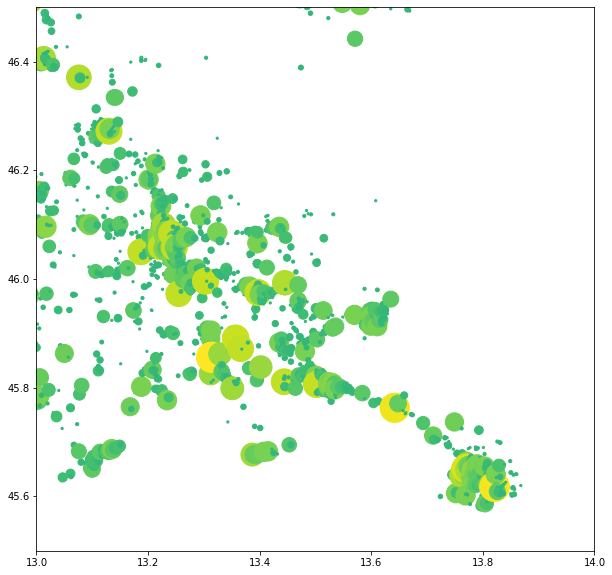

In [228]:
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(x, y, c = z, s = z*5)
ax.set_xlim(13,14)
ax.set_ylim(45.5,46.5)
plt.show

In [231]:
summary.shape

(8202, 3)